# Car Price prediction using Linear Regression

In [72]:
import pandas as pd

In [73]:
data = pd.read_csv('carpriceRegression.csv')

In [74]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


# Pre-Processing

In [75]:
#finding shape of data
data.shape

(205, 26)

In [76]:
# finding NULL values
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           0
carwidth            3
carheight           3
curbweight          1
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              1
compressionratio    2
horsepower          0
peakrpm             0
citympg             3
highwaympg          2
price               0
dtype: int64

In [77]:
mean = data.mean()
data1 = data.fillna(mean)

<ipython-input-77-286306cd2134>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()


In [78]:
data1.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [79]:
#description of Dataset
data1.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.816500,174.049268,65.928218,53.731683,2554.808824,126.907317,3.33010,3.254412,10.155271,104.117073,5125.121951,25.277228,30.822660,13276.710571
std,59.322565,1.245307,6.004449,12.337289,2.136275,2.433707,520.567373,41.642693,0.26942,0.313268,3.969584,39.544167,476.985643,6.467291,6.846931,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.54000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.200000,52.000000,2145.000000,97.000000,3.15000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.200000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.33000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.58000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.94000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [80]:
# converting categorical to numerical Data
data['fueltype'].replace(['gas','diesel'],[0,1],inplace= True)
data['aspiration'].replace(['std','turbo'],[0,1],inplace= True)
data['doornumber'].replace(['two','four'],[0,1],inplace= True)
data['carbody'].replace(['convertible','hatchback','sedan','wagon','hardtop'],[0,1,2,3,4],inplace= True)
data['drivewheel'].replace(['rwd','fwd','4wd'],[0,1,2],inplace= True)
data['enginelocation'].replace(['front','rear'],[0,1],inplace= True)
data['fuelsystem'].replace(['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'],[0,1,2,3,4,5,6,7],inplace= True)


In [81]:
data['fuelsystem'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [82]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


## **Train Test Split**

In [83]:
x = data1[['enginesize']]
y = data1[['price']]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25)

In [86]:
train_x.head()

,enginesize
153,92
189,109
32,79
155,92
120,90


In [87]:
test_x.head()

,enginesize
129,203
164,98
83,156
79,98
42,110


<ipython-input-88-9a137fc67dc4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corr()


<Axes: >

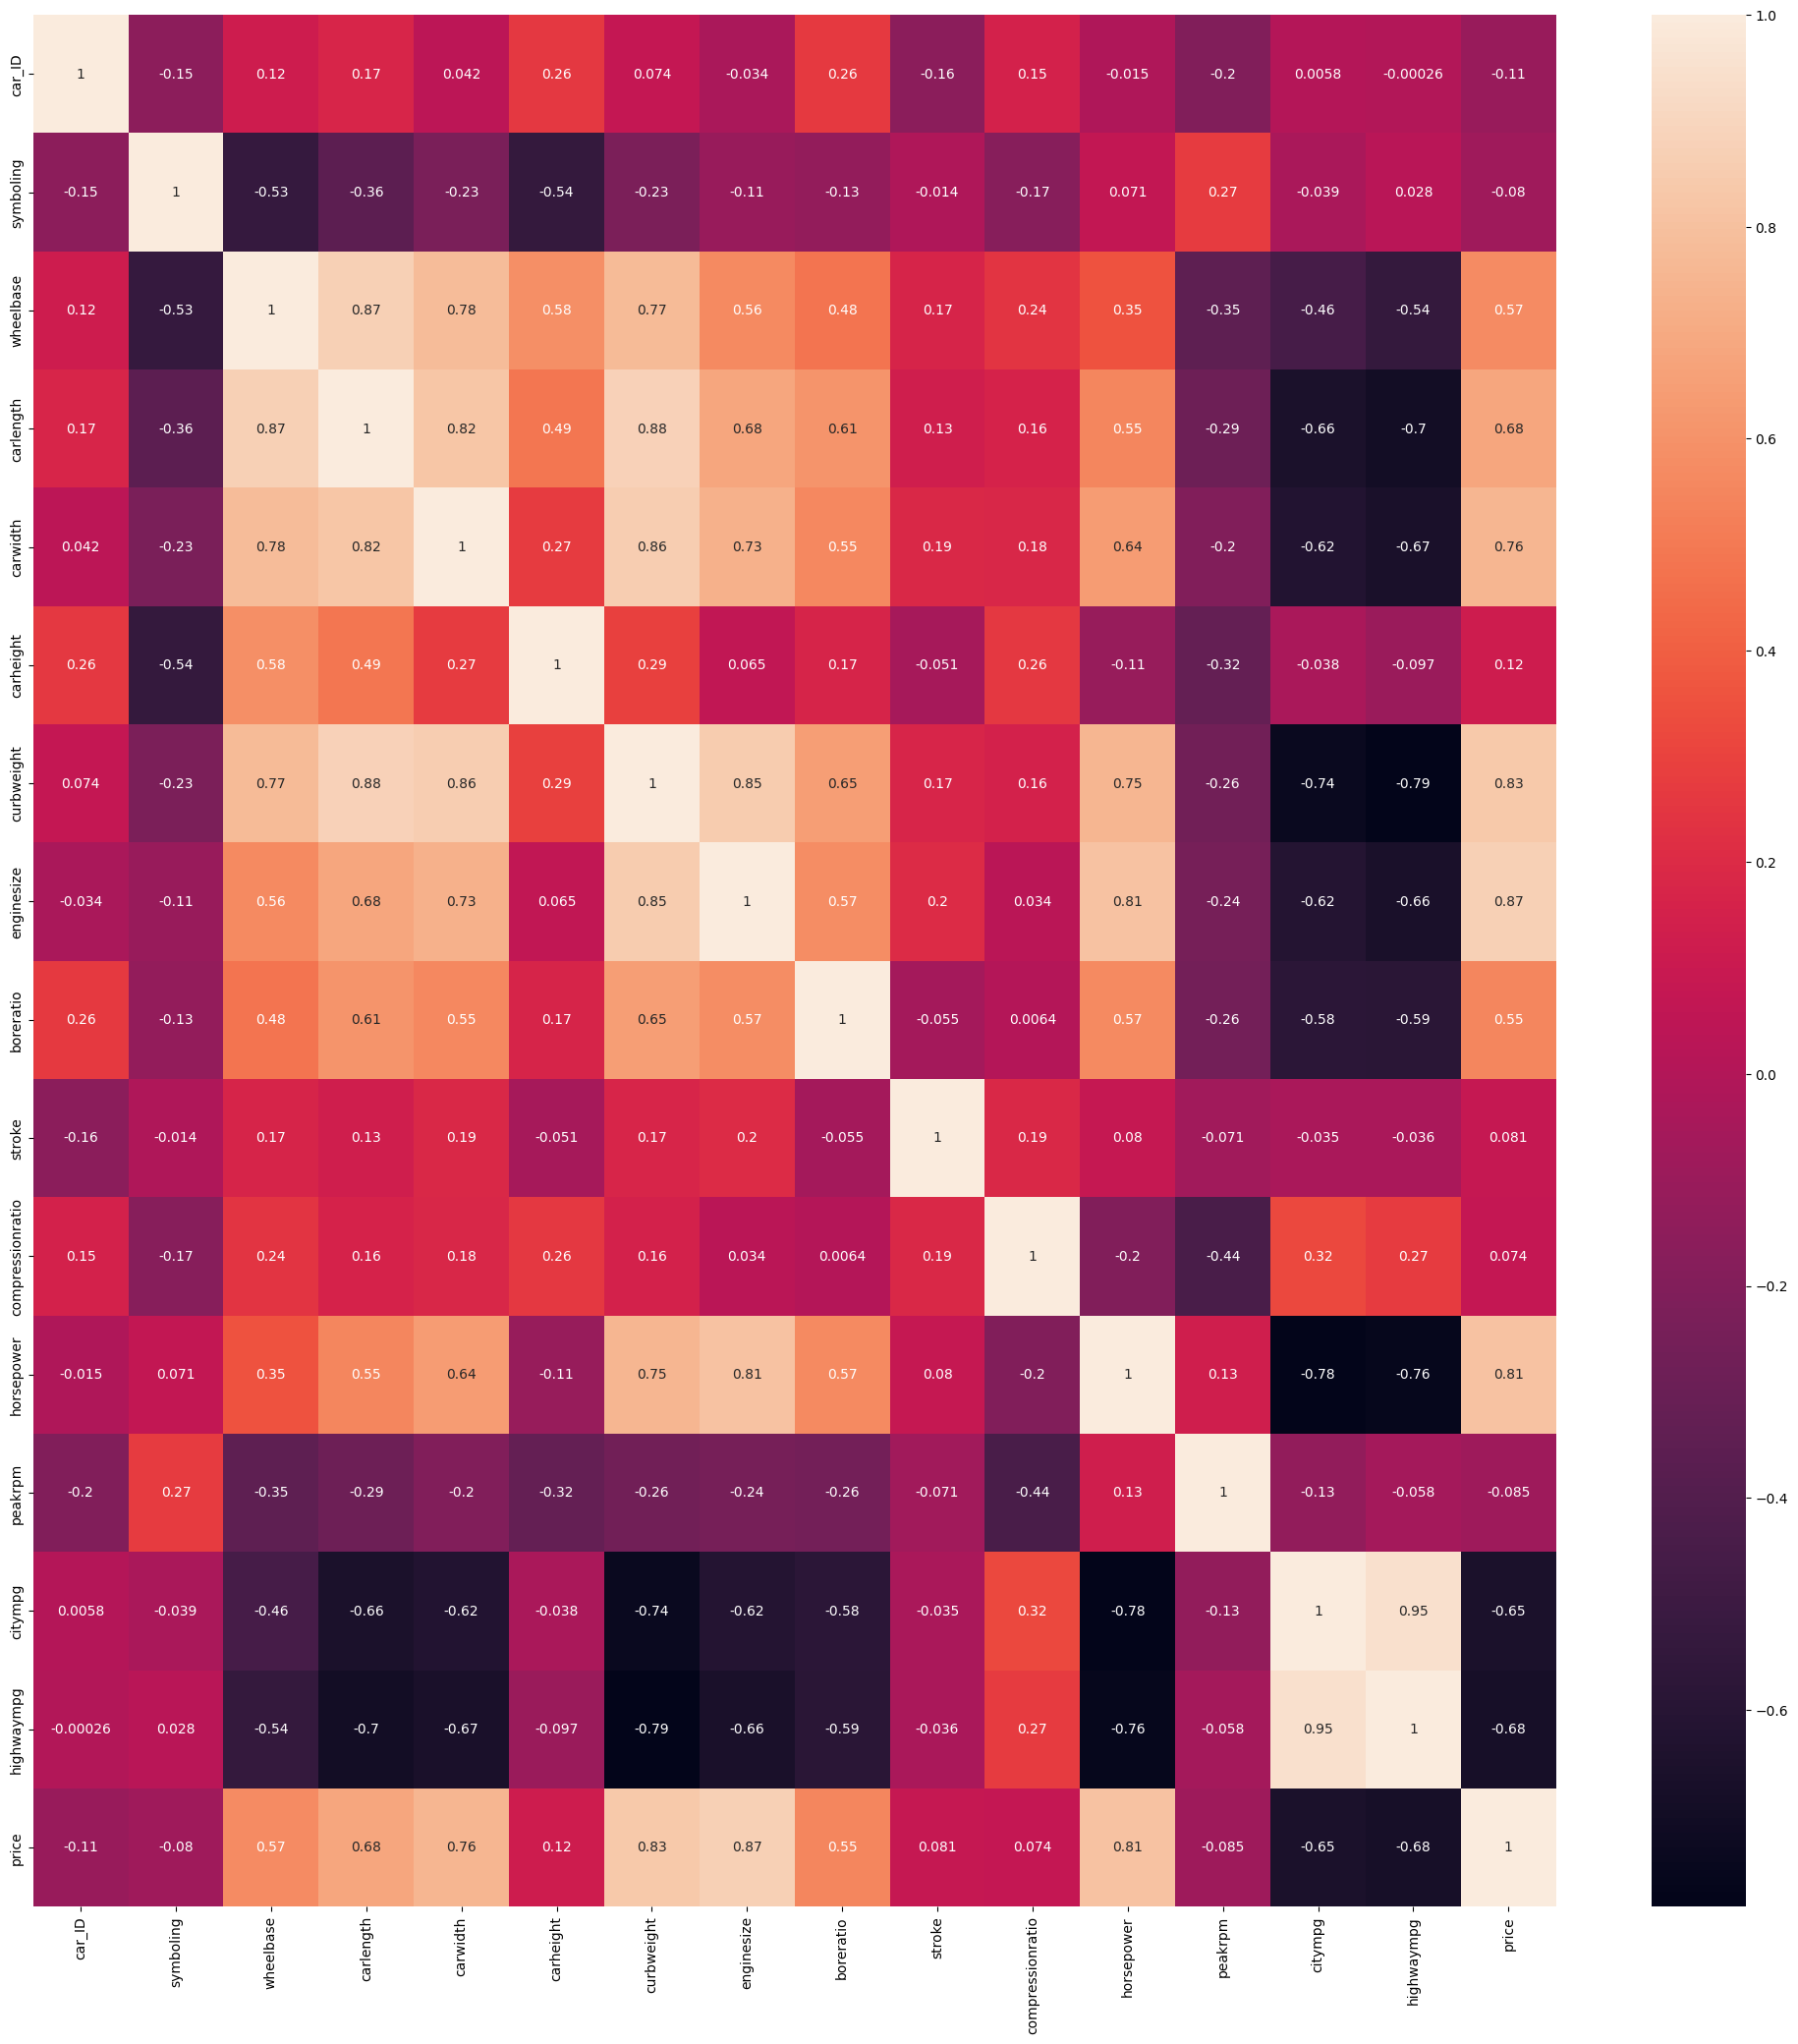

In [88]:
#plotting correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,25))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix,annot =True)


# Linear Regression - Univariate


In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()

In [91]:
model.fit(train_x,train_y)

LinearRegression()

In [92]:
predicted_y = model.predict(test_x)

Error Calculation

In [93]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [94]:
msr = mean_squared_error(predicted_y,test_y)

In [95]:
msr

17079400.484206013

In [96]:
# square root mean error
sqrtMSR = np.sqrt(msr)

In [97]:
sqrtMSR

4132.723131811035

In [98]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

In [99]:
ma = mean_absolute_error(predicted_y,test_y)

In [100]:
ma


2837.76067473079

In [101]:
#r2Score
from sklearn.metrics import r2_score

In [102]:
r2score = r2_score(test_y,predicted_y)

In [103]:
r2score

0.8513098557484657

<Axes: xlabel='enginesize', ylabel='price'>

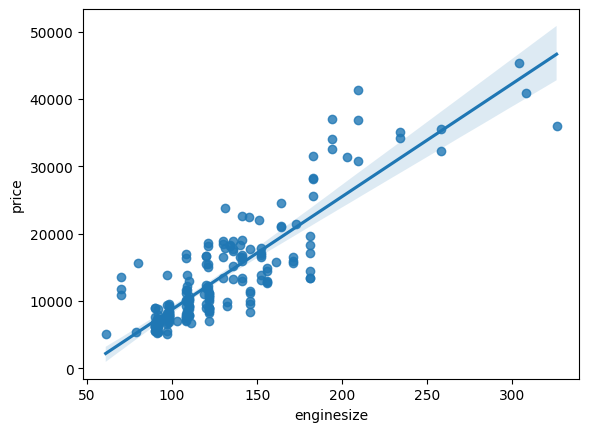

In [104]:
sns.regplot(x='enginesize',y='price',data=data1)

**Multi-Varent Prediction Model**

In [106]:

data_x = data.drop(columns=['price', 'CarName', 'car_ID'], axis=1)  # Removed 'axis='column'' as it's not necessary
data_y = data[['price']]  # This line seems correct if 'price' is the target variable


In [133]:
data_x.isna().sum()

symboling         0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
carlength         0
carwidth          3
carheight         3
enginesize        0
fuelsystem        0
horsepower        0
peakrpm           0
dtype: int64

In [108]:
model2 = LinearRegression()

In [138]:
data_x.drop(['carheight'],axis=1,inplace=True)

In [139]:
data_x.isna().sum()

symboling         0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginesize        0
fuelsystem        0
horsepower        0
peakrpm           0
dtype: int64

In [140]:
model2.fit(data_x,data_y)

LinearRegression()

In [143]:
predicted = model2.predict()

,enginesize
129,203
164,98
83,156
79,98
42,110
141,108
174,110
30,92
90,103
123,122
